In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
plt.style.use('seaborn-whitegrid')

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Text(0,0.5,'Number of houses')

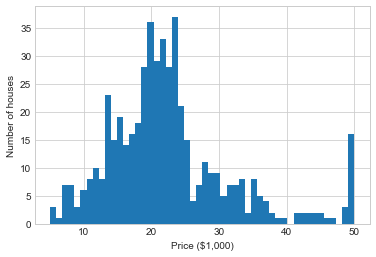

In [6]:
plt.hist(boston.target, bins=50)
plt.xlabel('Price ($1,000)')
plt.ylabel('Number of houses')

Text(0.5,0,'Number of rooms')

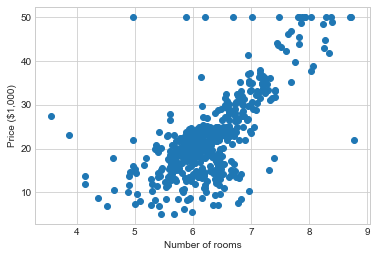

In [7]:
# 部屋数と価格の相関図
# 5番目の列(ラベルがRM)
plt.scatter(boston.data[:,5], boston.target)
plt.ylabel('Price ($1,000)')
plt.xlabel('Number of rooms')

In [93]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [94]:
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


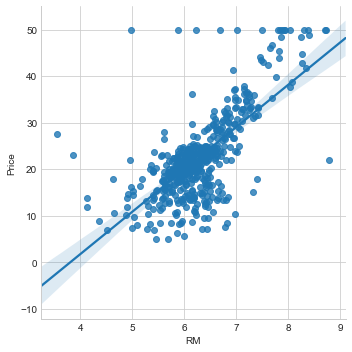

In [95]:
sns.lmplot('RM', 'Price', data=boston_df)

回帰直線は、データ全体にうまく適合するように、描かれています。各点から、回帰直線への距離をDとしてみましょう。このDを最小にすれば良いわけです。このイメージを図にしてみます。

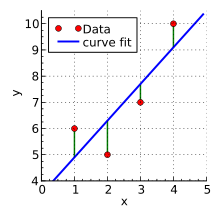

In [96]:
# wikipediaから拝借します。
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

各点（赤）の座標は、(x, y)です。ここから、回帰直線（青線）への距離をDとすると、以下の値を最小にする直線が一番よさそうです。

$$ d = D_{1}^2 + D_{2}^2 + D_{3}^2 + D_{4}^2 + ....+ D_{N}^2$$

直線の式は、

$$y=ax+b$$

で表現されます。いま、$a$と$b$を求めたいのですが、これはdを最小にする$a$と$b$を見つけ出すという問題と同じです。

この問題はもちろん、手で計算することで解くことができますが、ここではこの計算をNumpyやscikit-leranにお任せします。
もし数学的な計算方法に興味がある方は、[こちら](http://mathtrain.jp/seikiequ)が大変参考になります。

#### Numpyを使った単回帰

In [97]:
X = boston_df.RM
X.shape

(506,)

In [98]:
X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
5      6.430
6      6.012
7      6.172
8      5.631
9      6.004
10     6.377
11     6.009
12     5.889
13     5.949
14     6.096
15     5.834
16     5.935
17     5.990
18     5.456
19     5.727
20     5.570
21     5.965
22     6.142
23     5.813
24     5.924
25     5.599
26     5.813
27     6.047
28     6.495
29     6.674
       ...  
476    6.484
477    5.304
478    6.185
479    6.229
480    6.242
481    6.750
482    7.061
483    5.762
484    5.871
485    6.312
486    6.114
487    5.905
488    5.454
489    5.414
490    5.093
491    5.983
492    5.983
493    5.707
494    5.926
495    5.670
496    5.390
497    5.794
498    6.019
499    5.569
500    6.027
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [99]:
X = np.vstack(boston_df.RM)
X.shape

(506, 1)

In [100]:
X

array([[ 6.575],
       [ 6.421],
       [ 7.185],
       [ 6.998],
       [ 7.147],
       [ 6.43 ],
       [ 6.012],
       [ 6.172],
       [ 5.631],
       [ 6.004],
       [ 6.377],
       [ 6.009],
       [ 5.889],
       [ 5.949],
       [ 6.096],
       [ 5.834],
       [ 5.935],
       [ 5.99 ],
       [ 5.456],
       [ 5.727],
       [ 5.57 ],
       [ 5.965],
       [ 6.142],
       [ 5.813],
       [ 5.924],
       [ 5.599],
       [ 5.813],
       [ 6.047],
       [ 6.495],
       [ 6.674],
       [ 5.713],
       [ 6.072],
       [ 5.95 ],
       [ 5.701],
       [ 6.096],
       [ 5.933],
       [ 5.841],
       [ 5.85 ],
       [ 5.966],
       [ 6.595],
       [ 7.024],
       [ 6.77 ],
       [ 6.169],
       [ 6.211],
       [ 6.069],
       [ 5.682],
       [ 5.786],
       [ 6.03 ],
       [ 5.399],
       [ 5.602],
       [ 5.963],
       [ 6.115],
       [ 6.511],
       [ 5.998],
       [ 5.888],
       [ 7.249],
       [ 6.383],
       [ 6.816],
       [ 6.145

In [101]:
Y = boston_df.Price

numpyで単回帰をするには、ここから、少しだけ工夫が必要です。

直線の式は、
$$y=ax+b$$
これは、次のように書き直すことができます。
$$y=Ap$$
ただし:
$$A = \begin{bmatrix}x & 1\end{bmatrix}$$

$$p= \begin{bmatrix}a \\b\end{bmatrix}$$

Aとpはベクトルで、これらの内積で直線の式を表現しただけです。
データをこの形式に変更する必要があるので、次のようなコードを実行します。

In [102]:
# Xを[X 1]の形にします。
X = np.array([ [value, 1] for value in X])
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [103]:
np.linalg.lstsq(X, Y)

(array([  9.10210898, -34.67062078]),
 array([ 22061.87919621]),
 2,
 array([ 143.99484122,    2.46656609]))

In [104]:
# 最小二乗法の計算を実行します。
a, b = np.linalg.lstsq(X, Y)[0]

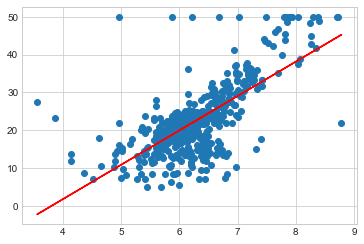

In [105]:
plt.plot(boston_df.RM, boston_df.Price, 'o')

x = boston_df.RM
plt.plot(x, a*x+b, 'r')

Pythonを使って、最小二乗法を用いて、単回帰を実行出来ました。
すべてのデータが完全に乗る直線を描くことは出来ませんので、どうしても誤差が出ます。

最小化しているのは、誤差の2乗和でした。ですので、全体の誤差が分かれば、それをサンプルの数で割って、平方根をとることで、ちょうど標準偏差のようなイメージで、平均誤差を計算できます。

[numpy.linalg.lstsqのドキュメント（英語）](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html)

In [106]:
result = np.linalg.lstsq(X, Y)

In [107]:
# 2つ目の要素に、誤差の合計が入っています。
error_total = result[1]

# 誤差の平均値の平方根を計算
rmse = np.sqrt(error_total/len(x))

In [108]:
print('平均二乗誤差の平方根={:0.2f}'.format(rmse[0]))

平均二乗誤差の平方根=6.60


それでは、重回帰へと話を進めましょう。
説明変数が1つだけだと単回帰ですが、重回帰は複数の説明変数を同時に扱うことができます。

scikit-learnの線形回帰ライブラリを利用します。
[linear regression library](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

sklearn.linear_model.LinearRegressionクラスは、データを元にモデルを作り、予測値を返すことができます。
モデルを作る時には、fit()メソッドを呼び、予測をするときは、predict()メソッドを使います。
今回は重回帰モデルを使いますが、他のモデルも同じように、fitとpredictメソッドを実装しているところが、scikit-learnの便利なところです。

In [109]:
import sklearn
from sklearn.linear_model import LinearRegression

In [110]:
lreg = LinearRegression()

lreg.fit() はデータを元にモデルを作ります。

lreg.predict() は作られたモデルを元に、予測値を返します。

lreg.score()は、決定係数を返します。
決定係数は、説明変数でどれくらいうまく目的変数の値を説明出来ているかの指標になります。[Wikipediaへのリンク](https://ja.wikipedia.org/wiki/%E6%B1%BA%E5%AE%9A%E4%BF%82%E6%95%B0)

In [111]:
# 説明変数
X_multi = boston_df.drop('Price', 1)
X_multi.shape

(506, 13)

In [112]:
# 目的変数
Y_target = boston_df.Price

In [113]:
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [114]:
# 切片の値
lreg.intercept_

36.491103280363404

In [115]:
# 係数の個数
len(lreg.coef_)

13

単回帰の時は、直線だったので、係数aと切片bはともに1つでした。今は、切片は1つですが、係数が13個あります。これは13個変数がある式になっている事を意味しています。

$$ y = b + a_1 x_1 + a_2 x_2 + \dots + a_{13} x_{13} $$

In [116]:
coeff_df = DataFrame(boston_df.columns)

In [117]:
coeff_df.columns = ['Features']

In [118]:
coeff_df["Cofficient Estimate"] = pd.Series(lreg.coef_)

In [131]:
coeff_df

,Features,Cofficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Step 7: 学習（Training）と検証（Validation）

ここまではすべてのデータを使って来ましたが、一部のデータを使って、モデルを作り、残りのデータを使って、モデルを検証するということができます。

サンプルをどのように分けるかが問題ですが、scikit-learnに便利な関数 train_test_split があるので、使って見ましょう。

サンプルを学習用のtrainと検証用のtestに分けてくれます。追加のパラメータを渡せば、割合も調整できます。
[詳しくはこちら](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)

In [140]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi, boston_df.Price)

In [141]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [142]:
lreg = LinearRegression()

In [143]:
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [144]:
pred_train = lreg.predict(X_train)

In [145]:
pred_test = lreg.predict(X_test)

In [146]:
# X_trainを使った平均二乗誤差を取得
np.mean((Y_train - pred_train)**2)

20.214101072597714

In [147]:
# X_testを使った平均二乗誤差を取得
np.mean((Y_test - pred_test)**2)

29.74745719911122

#### 残査プロット

回帰分析では、実際に観測された値と、モデルが予測した値の差を、残差と呼びます。

$$ 残差 = 観測された値 - 予測された値 $$

横軸に予測値、縦軸に実際の値との差をプロットしたものを、残差プロットと呼びます。

残差プロットを描いて、多くのデータがy=0の直線に近いところに集まれば、よいモデルが出来たことがわかります。
また、均一に点がプロットされている場合、線形回帰が適切だったことが分かります。そうでは無い場合は、非線形なモデルを使うことを検討しましょう。（これは後のレクチャーで解説します。）

Text(0.5,1,'Residual Plots')

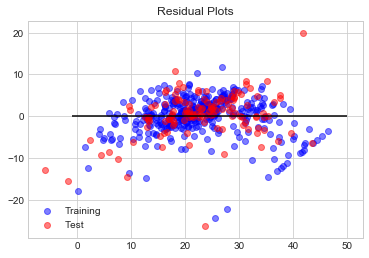

In [149]:
# 学習用の残査プロット
train = plt.scatter(pred_train, (pred_train - Y_train), c='b', alpha=0.5)
# テスト用の残査プロット
test = plt.scatter(pred_test, (pred_test - Y_test), c='r', alpha=0.5)
# y=0の水平な線を描いておきます。
plt.hlines(y=0, xmin=-1.0, xmax=50)

plt.legend((train, test), ('Training', 'Test'), loc='lower left')
plt.title('Residual Plots')

y=0の回りに、残差がランダムにばらけているように見えますので、モデルは良かったと言えそうです。
右下に直線上に並んだデータに関して調べて見るのは、興味深いかもしれません。